<a href="https://colab.research.google.com/github/hawary180318/TugasPertemuan10Phyton/blob/main/Copy_of_scenes_nn_4_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [214]:
ls

 1B7EC225-FC49-4F92-8FAF-796BB1089C86.jpeg
'73_Hawary siddik.pdf'
 92BA301C-3DC1-4DFE-B706-B59B1342358B.pdf
 Classroom/
'Colab Notebooks'/
 FISDAS
 FISDAS.gslides
'formulir pendaftaran asterisk-Hawary sid.pdf'
 hawary/
'hawary siddik_1101194388_uts matdis.pdf'
 image_classification/
 IMG_20200917_131823.jpg
'Jepretan Layar 2020-08-25 pukul 19.09.12.png'
'Jepretan Layar 2020-09-03 pukul 18.39.24.png'
'Jepretan Layar 2020-09-10 pukul 18.37.42.png'
'Jepretan Layar 2020-09-17 pukul 18.41.18.png'
'Jepretan Layar 2020-09-23 pukul 18.37.19.png'
'Jepretan Layar 2020-09-30 pukul 18.38.10.png'
'Jepretan Layar 2020-10-08 pukul 18.53.20.png'
'Jepretan Layar 2020-10-16 pukul 18.41.52.png'
'Jepretan Layar 2020-11-20 pukul 18.52.49.png'
'Jepretan Layar 2020-12-02 pukul 18.53.45.png'
 Kelompok7_DBank.pdf
'kuis soal no 1_Hawary siddik_1101194388.pdf'
'kuis soal no 3_Hawary siddik.pdf'
'kuis soal nomor 2_hawary siddik.pdf'
'Nilai - Tes Kecerdasan ( Alkika ).pdf'
 nnmodel_scene/
 Serendipity.2018.WEB-DL.

In [215]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [216]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("image_classification")
data = []
labels = []

[INFO] loading images...


In [218]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((70, 70))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [219]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [220]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [221]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [222]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(437, 70, 70, 3)
(146, 70, 70, 3)


In [228]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (3,3), activation='relu', input_shape=(70,70,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 68, 68, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_35 (Dense)             (None, 5)               

In [229]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [230]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [231]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [232]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 22ms/step - loss: 1.5796 - accuracy: 0.3249 - val_loss: 1.4906 - val_accuracy: 0.3562
Epoch 2/25
14/14 [==============================] - 0s 7ms/step - loss: 1.3660 - accuracy: 0.4783 - val_loss: 1.2826 - val_accuracy: 0.5068
Epoch 3/25
14/14 [==============================] - 0s 7ms/step - loss: 1.1267 - accuracy: 0.5400 - val_loss: 1.0266 - val_accuracy: 0.6301
Epoch 4/25
14/14 [==============================] - 0s 7ms/step - loss: 0.9215 - accuracy: 0.6430 - val_loss: 0.8632 - val_accuracy: 0.7055
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7711 - accuracy: 0.7071 - val_loss: 0.7177 - val_accuracy: 0.7877
Epoch 6/25
14/14 [==============================] - 0s 7ms/step - loss: 0.7284 - accuracy: 0.7140 - val_loss: 0.8056 - val_accuracy: 0.6918
Epoch 7/25
14/14 [==============================] - 0s 7ms/step - loss: 0.5898 - accuracy: 0.8124 - val_loss: 0.6067 - val_accuracy: 0.8151
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


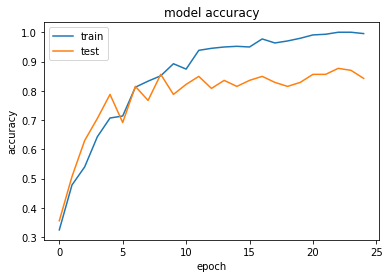

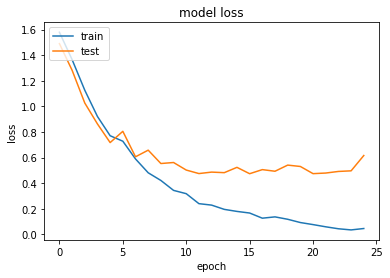

In [233]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [234]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.83      0.80      0.82        25
      GMB_02       0.93      0.80      0.86        35
      GMB_03       0.93      0.87      0.90        30
      GMB_04       0.85      0.77      0.81        30
      GMB_05       0.70      1.00      0.83        26

    accuracy                           0.84       146
   macro avg       0.85      0.85      0.84       146
weighted avg       0.86      0.84      0.84       146



In [235]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [236]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200917_131823.jpg'

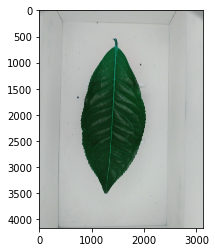

In [237]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [243]:
image_testing = Image.open('IMG_20200917_131823.jpg')
image_testing = np.array(image_testing.resize((70, 70))) / 255.0
image_testing.shape

(70, 70, 3)

In [244]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 70, 70, 3)


In [245]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[5.44395149e-01 2.80322224e-01 5.72245009e-02 1.17707625e-01
  3.50483839e-04]]
['GMB_01']
